# Testing
## Generate Toy Dataset

In [1]:
from sklearn.datasets.samples_generator import make_blobs
centers = [[-1,0], [1,0]]
X, y = make_blobs(n_samples=100, centers=centers, cluster_std = 0.4, n_features=2, random_state=0)
y = (y*2)-1

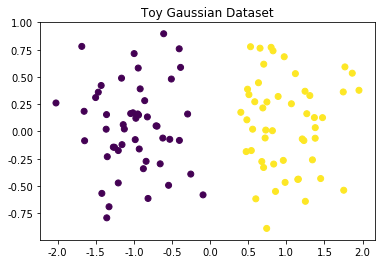

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y)
ax.set_autoscale_on(True)
ax.set_title('Toy Gaussian Dataset')
plt.show()

## Outlier Detection Test
Test that the outlier detection will remove an obvious outlier.

### Generate Outlier Data

In [3]:
Xhat = np.vstack((X, np.array([[2,2]])))
yhat = np.concatenate((y, np.array([2])), axis=0)

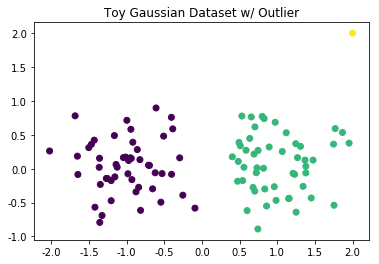

In [4]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.scatter(Xhat[:,0], Xhat[:,1], c=yhat)
ax.set_autoscale_on(True)
ax.set_title('Toy Gaussian Dataset w/ Outlier')
plt.show()

### Apply Defender on Outlier Data

In [5]:
from advlearn.defenses import KthNeighbor
defense = KthNeighbor(outlier_distance_threshold=1)
Xout, yout, used = defense.fit_transform(Xhat, yhat)

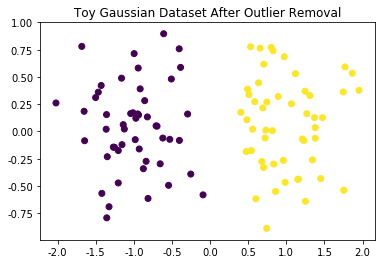

In [6]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.scatter(Xout[:,0], Xout[:,1], c=yout)
ax.set_autoscale_on(True)
ax.set_title('Toy Gaussian Dataset After Outlier Removal')
plt.show()

## Lasso Attack Test
Test that the Lasso attack generates reasonable data.

In [7]:
from advlearn.attacks.poison import GeneralLinearAttack
attacker = GeneralLinearAttack()
attacker.fit(X, y)
Xattack, yattack = attacker.get_attack_point()

In [8]:
Xhat = np.vstack((X, Xattack))
yhat = np.concatenate((y, np.array([yattack])), axis=0)

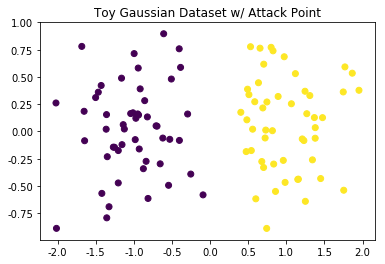

In [9]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.scatter(Xhat[:,0], Xhat[:,1], c=yhat)
ax.set_autoscale_on(True)
ax.set_title('Toy Gaussian Dataset w/ Attack Point')
plt.show()

## Lasso Test
Test that the Lasso classifier works

In [10]:
from advlearn.classifier import OnlineLasso
lasso = OnlineLasso()
lasso.fit(X,y)
ypred = lasso.predict(X)
ypred = np.sign(ypred)

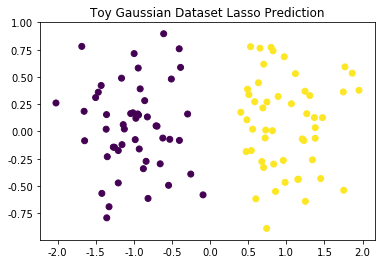

In [11]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=ypred)
ax.set_autoscale_on(True)
ax.set_title('Toy Gaussian Dataset Lasso Prediction')
plt.show()

## Test Lasso Attack Pipeline

In [12]:
from advlearn.pipeline import Pipeline
steps = [('KthNeighbor', KthNeighbor()), ('OnlineLasso', OnlineLasso())]
lasso_outlier = Pipeline(steps)
lasso = OnlineLasso()

Xattack = np.array([[20,20]])
yattack = np.array([-1])

lasso_outlier.fit(X, y)
lasso_outlier.fit(Xattack, yattack)
lasso_outlier.fit(Xattack, yattack)
lasso_outlier.fit(Xattack, yattack)
lasso_outlier.fit(Xattack, yattack)
lasso_outlier.fit(Xattack, yattack)

lasso.fit(X, y)
lasso.fit(Xattack, yattack)
lasso.fit(Xattack, yattack)
lasso.fit(Xattack, yattack)
lasso.fit(Xattack, yattack)
lasso.fit(Xattack, yattack)

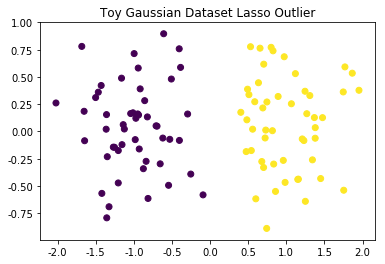

In [13]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=np.sign(lasso_outlier.predict(X)))
ax.set_autoscale_on(True)
ax.set_title('Toy Gaussian Dataset Lasso Outlier')
plt.show()

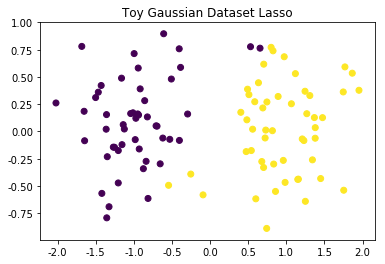

In [14]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=np.sign(lasso.predict(X)))
ax.set_autoscale_on(True)
ax.set_title('Toy Gaussian Dataset Lasso')
plt.show()